In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


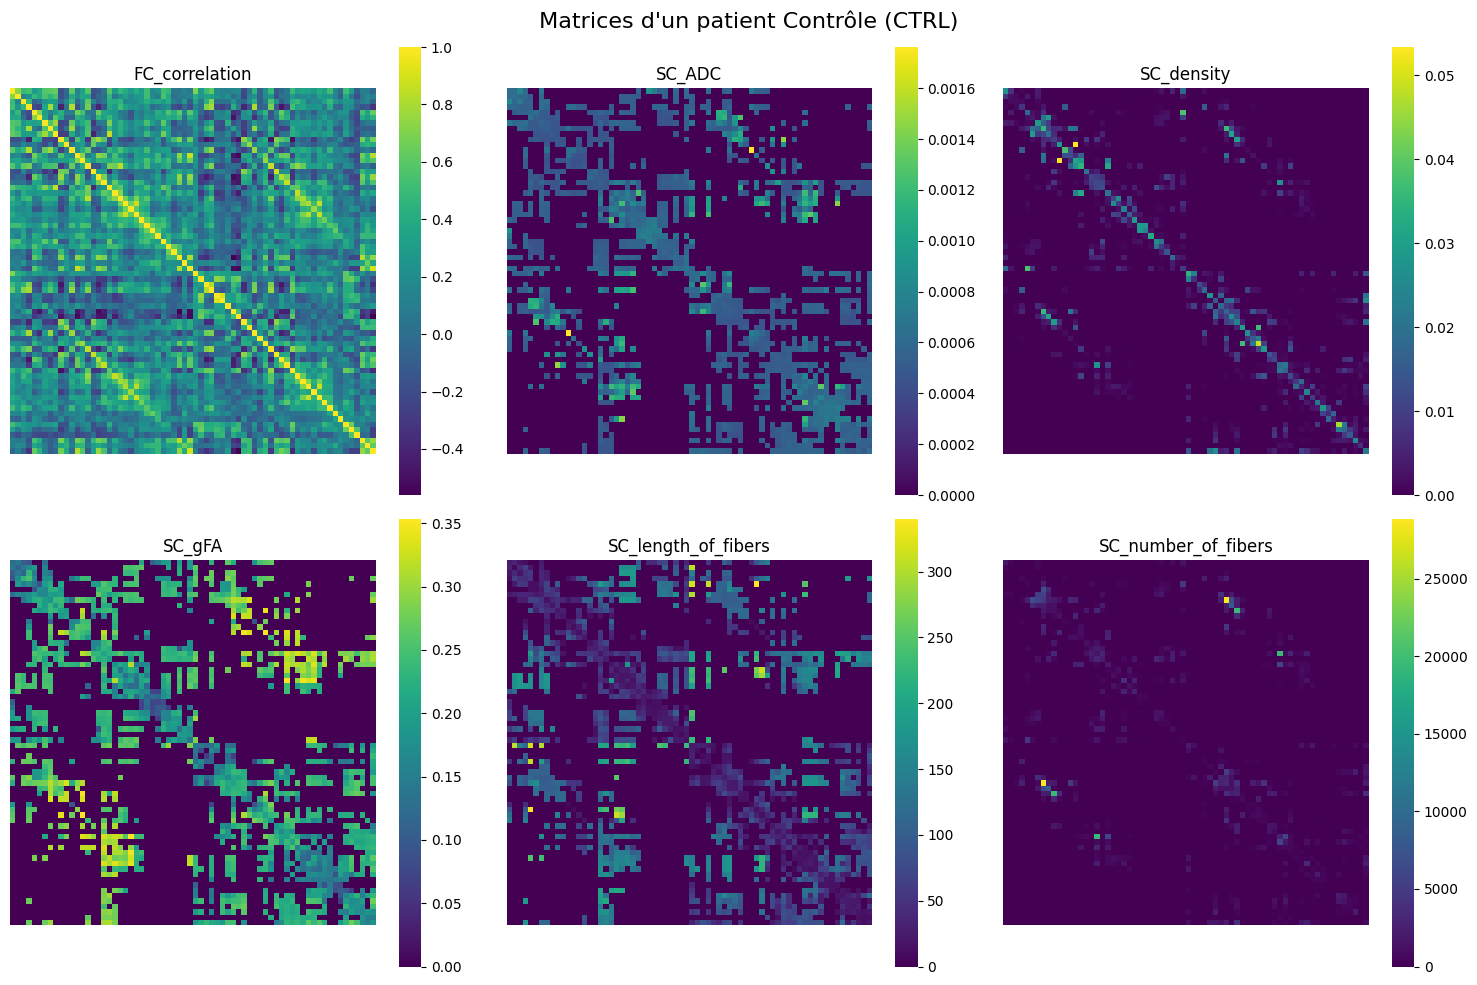

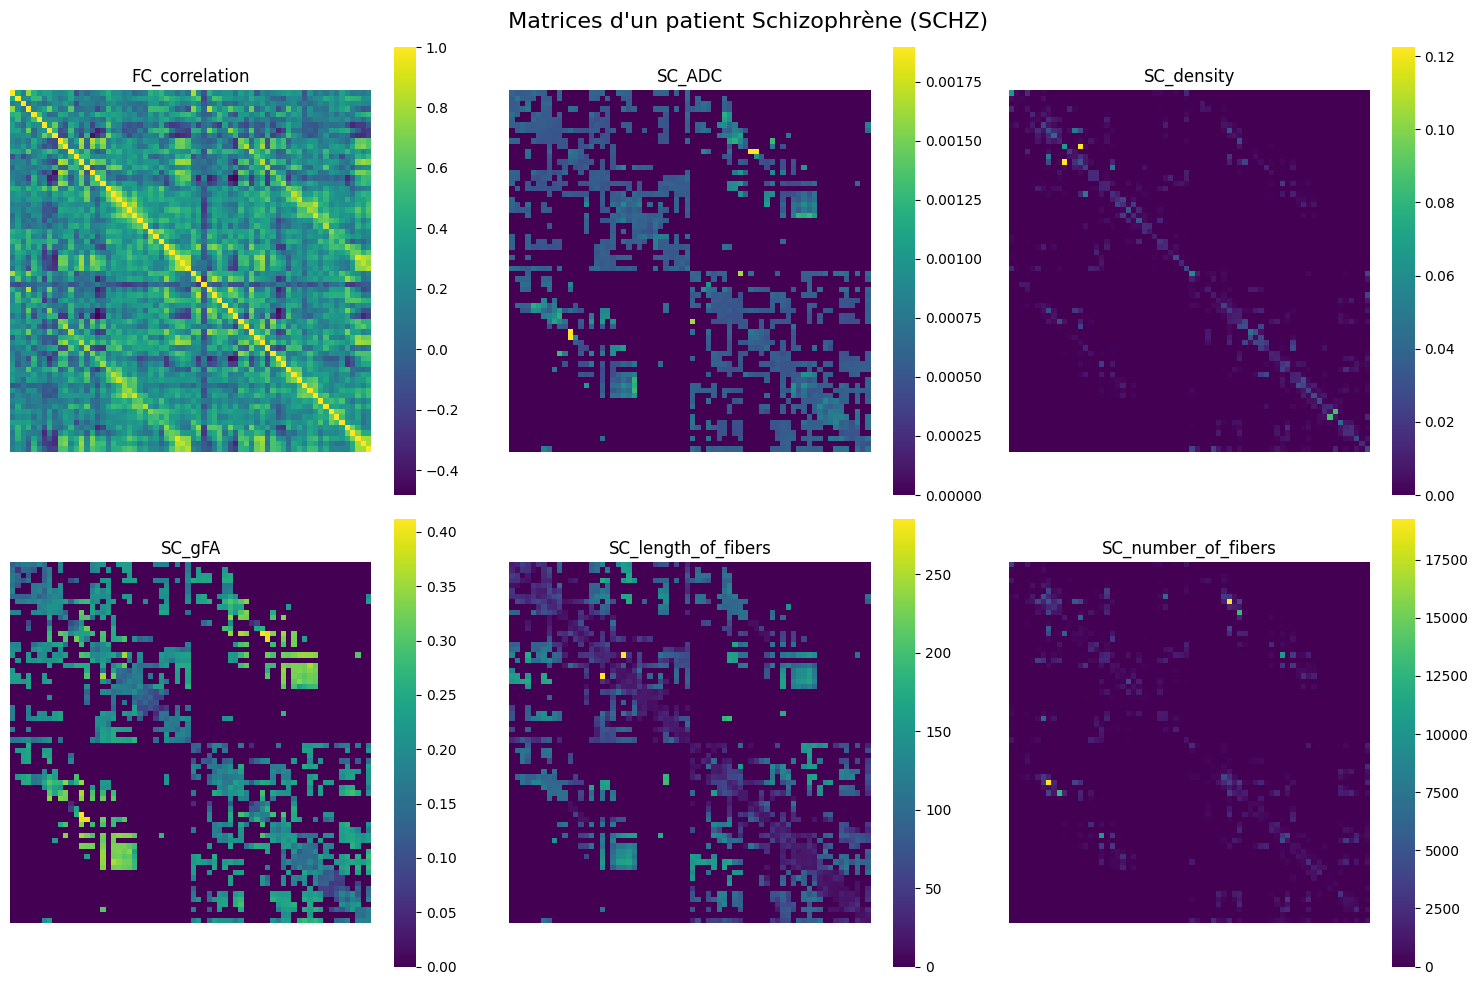

In [4]:
# 📂 Chemin du fichier HDF5
h5_path = "Data_ML/SC_FC_dataset_filtered_68x68.h5"

# 🔑 Clés des matrices SC et FC
keys = ['FC_correlation', 'SC_ADC', 'SC_density', 'SC_gFA', 'SC_length_of_fibers', 'SC_number_of_fibers']

# 📌 Ouvrir le fichier HDF5 et récupérer un patient contrôle et un patient schizophrène
with h5py.File(h5_path, 'r') as f:
    # Sélectionner un patient contrôle (indice 0)
    ctrl_data = {key: f[key]['ctrl'][10] for key in keys}
    
    # Sélectionner un patient schizophrène (indice 0)
    schz_data = {key: f[key]['schz'][10] for key in keys}

# 📊 Fonction pour afficher toutes les matrices
def plot_matrices(data_dict, title):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 lignes, 3 colonnes
    fig.suptitle(title, fontsize=16)

    for ax, (key, matrix) in zip(axes.flat, data_dict.items()):
        sns.heatmap(matrix, ax=ax, cmap="viridis", square=True, cbar=True)
        ax.set_title(key, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

# 📌 Affichage des matrices pour un patient contrôle
plot_matrices(ctrl_data, title=" Matrices d'un patient Contrôle (CTRL)")

# 📌 Affichage des matrices pour un patient schizophrène
plot_matrices(schz_data, title=" Matrices d'un patient Schizophrène (SCHZ)")


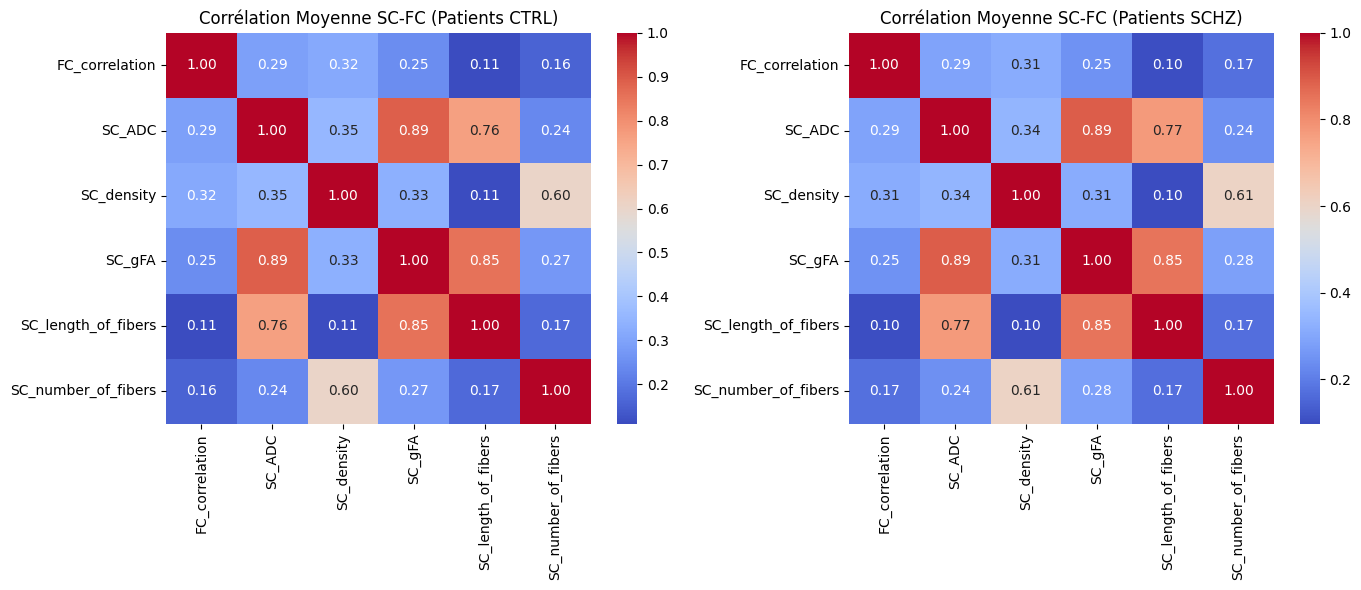

In [ ]:
# 📌 Ouvrir le fichier et récupérer toutes les matrices SC et FC
with h5py.File(h5_path, 'r') as f:
    # Récupérer toutes les matrices pour tous les patients (CTRL & SCHZ)
    ctrl_matrices = {key: f[key]['ctrl'][:] for key in keys}  # (27, 68, 68)
    schz_matrices = {key: f[key]['schz'][:] for key in keys}  # (27, 68, 68)

# 📊 Fonction pour calculer la matrice de corrélation moyenne
def compute_avg_correlation(matrices_dict):
    """
    Calcule la moyenne des matrices de corrélation entre FC et SC sur tous les patients.
    """
    num_patients = matrices_dict['FC_correlation'].shape[0]  # Nombre de patients
    correlations = []

    for i in range(num_patients):
        patient_data = np.array([matrices_dict[key][i].flatten() for key in keys])  # Convertir en vecteurs
        corr_matrix = np.corrcoef(patient_data)  # Calculer la corrélation entre matrices
        correlations.append(corr_matrix)  # Stocker la matrice de corrélation

    return np.mean(correlations, axis=0)  # Moyenne des matrices de corrélation

# 📌 Calculer la corrélation moyenne pour CTRL et SCHZ
ctrl_corr_avg = compute_avg_correlation(ctrl_matrices)
schz_corr_avg = compute_avg_correlation(schz_matrices)

# 📌 Affichage des matrices côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 📊 Heatmap pour les contrôles
sns.heatmap(ctrl_corr_avg, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=keys, yticklabels=keys, ax=axes[0])
axes[0].set_title("Corrélation Moyenne SC-FC (Patients CTRL)")

# 📊 Heatmap pour les schizophrènes
sns.heatmap(schz_corr_avg, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=keys, yticklabels=keys, ax=axes[1])
axes[1].set_title("Corrélation Moyenne SC-FC (Patients SCHZ)")

plt.tight_layout()
plt.show()


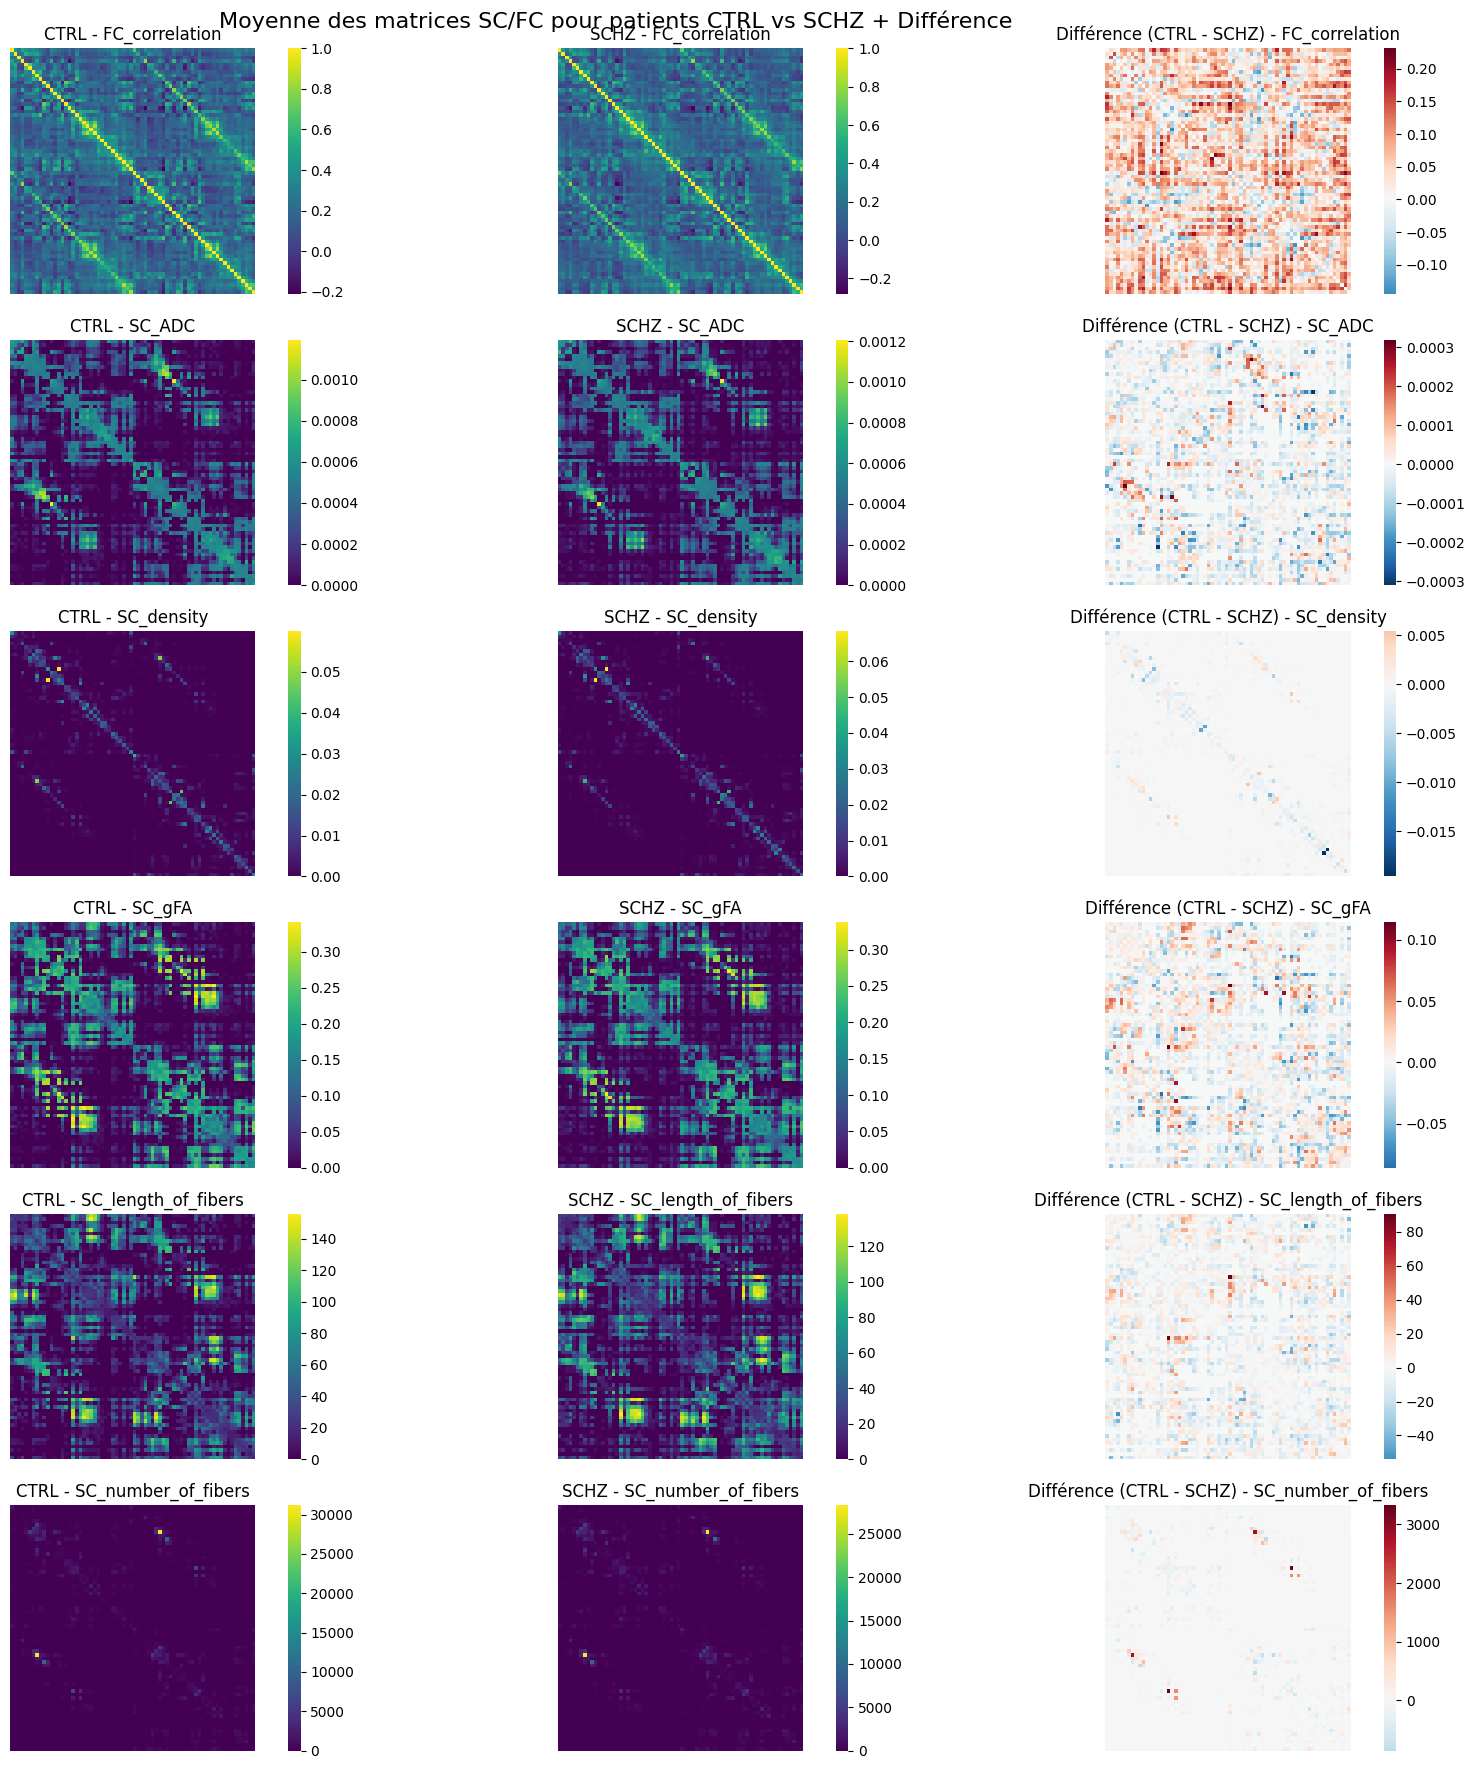

In [ ]:
# 📌 Ouvrir le fichier et calculer la moyenne des matrices pour CTRL et SCHZ
with h5py.File(h5_path, 'r') as f:
    avg_ctrl = {key: np.mean(f[key]['ctrl'], axis=0) for key in keys}  # Moyenne des matrices CTRL
    avg_schz = {key: np.mean(f[key]['schz'], axis=0) for key in keys}  # Moyenne des matrices SCHZ
    avg_diff = {key: avg_ctrl[key] - avg_schz[key] for key in keys}  # Différence (CTRL - SCHZ)

# 📌 Affichage des moyennes et de la différence sous forme de heatmaps
fig, axes = plt.subplots(6, 3, figsize=(18, 18))  # 6 lignes, 3 colonnes
fig.suptitle("Moyenne des matrices SC/FC pour patients CTRL vs SCHZ + Différence", fontsize=16)

for i, key in enumerate(keys):
    # Heatmap pour les patients CTRL
    sns.heatmap(avg_ctrl[key], ax=axes[i, 0], cmap="viridis", square=True, cbar=True)
    axes[i, 0].set_title(f"CTRL - {key}")
    axes[i, 0].axis('off')

    # Heatmap pour les patients SCHZ
    sns.heatmap(avg_schz[key], ax=axes[i, 1], cmap="viridis", square=True, cbar=True)
    axes[i, 1].set_title(f"SCHZ - {key}")
    axes[i, 1].axis('off')

    # Heatmap pour la différence (CTRL - SCHZ)
    sns.heatmap(avg_diff[key], ax=axes[i, 2], cmap="RdBu_r", square=True, center=0, cbar=True)
    axes[i, 2].set_title(f"Différence (CTRL - SCHZ) - {key}")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
